
<figure>
<img src="/work/Modulo3_Caso1/fig/ISEADE LOGO Y ESCUDO.png" align="center"/> 
</figure> 

# Caso 1 - Introducción a los datos

## Problema de Negocio

Nos han dado a la tarea de entender varias características de nuestros clientes:
- ¿Qué podemos decir de ellos?
- ¿Qué puedes decir sobre los resultados de la campaña?
- Si fuéramos a lanzar una nueva campaña de marketing ¿cuáles serían los puntos de conversación más importantes?

## Importación de Módulos

Dado que Python es un lenguaje de programación multipropósito, es necesaria la instalación y/o importación de módulos necesarios para trabajar con datos. Podemos encontrar librerías para gestionar los datos tales como [Numpy](https://numpy.org/doc/) y [Pandas](https://pandas.pydata.org/docs/), módulos para generación de gráficos [seaborn](https://seaborn.pydata.org/) y [matplotlib](https://matplotlib.org/) y módulos para realizar modelos de Machine Learning [sklearn](https://scikit-learn.org/stable/) y [statsmodels](https://www.statsmodels.org/stable/index.html)

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Importación de Datos

La información fue descargada de un conjunto de datos disponible en [Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis). Estos datos son tabulares, y se encuentran en formato .csv. Por lo tanto pueden ser cargadas como una tabla en python. Esto puede ser realizado por medio de un DataFrame de pandas.  

In [ ]:
df_customers = pd.read_csv('/work/Modulo3_Caso1/data/Customers.csv',sep='\t')
df_customers.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


### CONTENIDO

Las tablas de datos suelen ir acompañadas de un diccionario de datos que explica el contenido de la información contenida en una de las columnas y, en ocasiones, proporciona algún contexto empresarial. 

#### Gente

- ID: identificador único del cliente
- Year_Birth: año de nacimiento del cliente
- Educación: nivel de educación del cliente
- Marital_Status: estado civil del cliente
- Ingresos: ingresos familiares anuales del cliente
- Kidhome: Número de niños en el hogar del cliente
- Teenhome: Número de adolescentes en el hogar del cliente
- Dt_Cliente: Fecha de alta del cliente en la empresa
- Actualidad: Número de días desde la última compra del cliente
- Queja: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

#### Productos

- MntWines: Cantidad gastada en vino en los últimos 2 años
- MntFruits: Cantidad gastada en frutas en los últimos 2 años
- MntMeatProducts: cantidad gastada en carne en los últimos 2 años
- MntFishProducts: cantidad gastada en pescado en los últimos 2 años
- MntSweetProducts: cantidad gastada en dulces en los últimos 2 años
- MntGoldProds: cantidad gastada en oro en los últimos 2 años


#### Promoción

- NumDealsPurchases: Número de compras realizadas con descuento
- AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario
- AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario
- AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ra campaña, 0 en caso contrario
- AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario
- AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario
- Respuesta: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario


#### Lugar

- NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa
- NumCatalogPurchases: Número de compras realizadas utilizando un catálogo
- NumStorePurchases: Número de compras realizadas directamente en tiendas
- NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes 


## Análisis Exploratorio de Datos (EDA)

Una vez los datos se encuentran cargados debemos poder comprender los datos con los que estamos trabajando antes de que podamos comenzar a trabajar en ellos.

 En python es posible utilizar los atributos de los DataFrames para poder tener una visión general de los datos almacenados.

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Ejemplo 1

También podemos realizar gráficas para observar los datos. En este caso, podemos revisar la información obtenida en la columna `YearBirth` (Año de nacimiento)

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

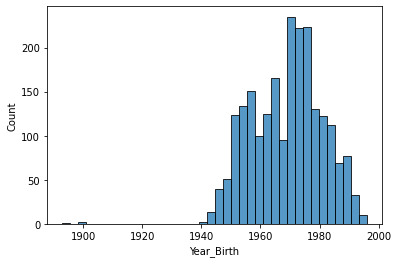

In [ ]:
sns.histplot(df_customers['Year_Birth'])

Podemos observar para la columna `YearBirth` (Año de nacimiento):
- Los datos son numéricos y continuos
- Existen datos atípicos. Probablemente resultante de algún error anterior

Esto nos permite afirmar que:
- Aproximadamente nuestros clientes tienen entre 80 y 24 años.
- Aproximadamente nuestros clientes tienen en promedio 52 años. 

Por lo tanto nuestras estrategias de ventas, promoción y servicio deberán estar enfocadas hacia ese sector de la población

### Ejemplo 2

Podemos obtener diferentes medidas de agrupamiento para la información obtenida en cada columna

In [ ]:
df_customers['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [ ]:
print('Mínimo: ', df_customers['Year_Birth'].min())
print('Máximo: ', df_customers['Year_Birth'].max())
print('Promedio: ', df_customers['Year_Birth'].mean())
print('Mediana: ', df_customers['Year_Birth'].median())
print('Moda: ', df_customers['Year_Birth'].mode().values)

Mínimo:  1893
Máximo:  1996
Promedio:  1968.8058035714287
Mediana:  1970.0
Moda:  [1976]


### Ejemplo 3

También podemos revisar la información obtenida en la columna `Kidhome` (Niños en casa)

<AxesSubplot:xlabel='Kidhome', ylabel='Count'>

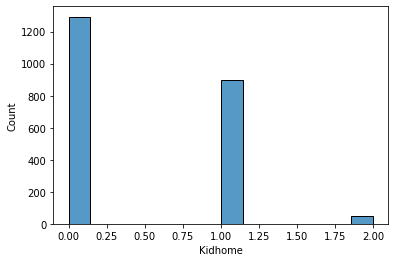

In [ ]:
sns.histplot(df_customers['Kidhome'])

In [ ]:
df_customers['Kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

Podemos observar para la columna `Kidhome` (Niños en casa):
- Los datos son categóricos discretos

Esto nos permite afirmar que:
- Nuestros clientes tienen entre 0 y 2 hijos
- Nuestros clientes tienen en promedio 0.44 hijos.
- La mayor parte de nuestos clientes no tienen hijos.  

Por lo tanto nuestras estrategias de ventas, promoción y servicio deberán estar enfocadas hacia ese sector de la población

### Ejemplo 4

Explorar similaridades entre los ingresos (`Income`) de mis clientes diferenciados por el estado civil

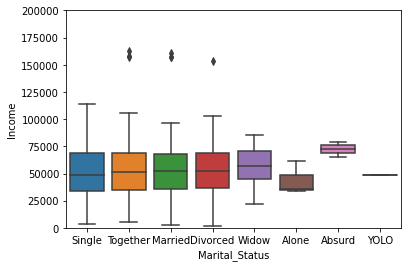

In [ ]:
sns.boxplot(x='Marital_Status',y='Income',data=df_customers)
plt.ylim(0,200000);

Podemos ver que, con excepción de viudo, no parece existir una diferencia importante entre los diferentes estados civiles. Los estados tales como "Alone", "Absurd" y "YOLO" no son relevantes en la situación de negocio y no poseen los sificientes datos para ser tenidos en cuenta. Eventualmente deberán ser removidos.

### Ejercicio 1

¿Qué información adicional podemos obtener sobre las siguientes columnas?
- Education
- Marital_Status
- Income
- Response


**Respuesta**

### Ejemplo 5

Obtener el promedio de compras realizadas en descuento (`NumDealsPurchases`) para los clientes con diferente cantidad de hijos (`Kidhome`).

In [ ]:
df_customers_agrupado = df_customers[['NumDealsPurchases','Kidhome']].groupby(['Kidhome']).mean()
print(df_customers_agrupado)


         NumDealsPurchases
Kidhome                   
0                 1.944316
1                 2.845384
2                 2.833333


### Ejercicio 2

Obtener la mayor cantidad de ingresos obtenidos (`Income`) para los clientes con diferente tipo de educación (`Education`).

**Respuesta**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6bb6c849-6b4b-49a2-8775-80ecb8e8b9b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>